<a href="https://colab.research.google.com/github/Squirrelcoding/random-projects/blob/main/airports/Airport_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import ee
import torch
import sklearn
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [96]:
from google.colab import userdata

ee.Authenticate()
ee.Initialize(project=userdata.get('PROJECT_NAME'))

(np.float64(-0.5), np.float64(992.5), np.float64(683.5), np.float64(-0.5))

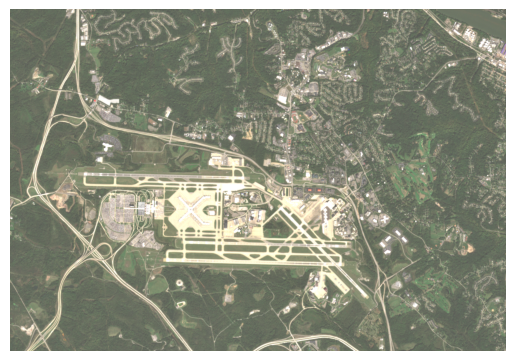

In [97]:
import ee, geemap

data = {"type":"Polygon","coordinates":[[[-80.288361,40.531334],[-80.171974,40.531334],[-80.171974,40.470591],[-80.288361,40.470591],[-80.288361,40.531334]]]}

aoi = ee.Geometry.Polygon(data['coordinates'])
image = (ee.ImageCollection('COPERNICUS/S2_SR')
           .filterBounds(aoi)
           .filterDate('2019-01-01', '2019-12-31')
           .sort('CLOUDY_PIXEL_PERCENTAGE')
           .first()
           .clip(aoi))

# Define visualization parameters
vis_params = {
    'bands': ['B4', 'B3', 'B2'],  # True color (RGB)
    'min': 0,
    'max': 3000,
    'dimensions': 512,
    'region': aoi
}

# Get image thumbnail as NumPy array
thumb = geemap.ee_to_numpy(image, region=aoi, bands=['B4', 'B3', 'B2'], scale=10)

# Normalize and convert to uint8
def normalize(array):
    array = np.clip(array, 0, 3000)
    return ((array / 3000) * 255).astype(np.uint8)

rgb_image = np.stack([normalize(thumb[:, :, i]) for i in range(3)], axis=-1)

# Display using matplotlib
plt.imshow(rgb_image)
plt.axis('off')